In [ ]:
!pip install openml

In [ ]:
import openml
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from openml.datasets import edit_dataset, fork_dataset, get_dataset

In [ ]:
# This is done based on the dataset ID.
dataset = openml.datasets.get_dataset(42890)

# Storing the data
eeg, *_ = dataset.get_data()

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
# For now we will just be looking at Machine Failure, I will do this for the other failures
# I also don't think Type provides much - I need to remove Product ID as it is a string
# I will just be identifying based of
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
target_cols = ['Machine failure']

X = df_filtered.drop(columns='Machine failure', axis=1)
y = eeg[target_cols]

In [ ]:
# Plain old train test split nothing else yet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Create a single classification tree
# This is to gain insight into our data

# I know in the requirments it's stated to use depth (2-5) - However,
# at depth 6 there is a 10% increase in accuracy
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9753333333333334




---



In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'HDF', 'PWF', 'OSF', 'RNF'])
target_cols = ['TWF']

X = df_filtered.drop(columns='TWF', axis=1)
y = eeg[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Yeilds a negative score
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.995




---



In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'PWF', 'OSF', 'RNF'])
target_cols = ['HDF']

X = df_filtered.drop(columns='HDF', axis=1)
y = eeg[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# High score
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.994




---



In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'OSF', 'RNF'])
target_cols = ['PWF']

X = df_filtered.drop(columns='PWF', axis=1)
y = eeg[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Not bad
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.995




---



In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'RNF'])
target_cols = ['OSF']

X = df_filtered.drop(columns='OSF', axis=1)
y = eeg[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9933333333333333


In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF'])
target_cols = ['RNF']

X = df_filtered.drop(columns='RNF', axis=1)
y = eeg[target_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.999


In [ ]:
# Again but with a different target
df_filtered = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
target_cols = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'Air temperature [K]',
                  'Process temperature [K]', 'Rotational speed [rpm]',
                  'Torque [Nm]', 'Tool wear [min]'])

X = df_filtered
y = target_cols

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
est = tree.DecisionTreeClassifier(max_depth=3)

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9693333333333334




---



In [ ]:
# Need a list of the
eegCols = df_filtered.columns.tolist()

In [ ]:
target_classes = eeg.drop(columns=['UDI', 'Product ID', 'Type', 'Machine failure', 'Air temperature [K]',
                  'Process temperature [K]', 'Rotational speed [rpm]',
                  'Torque [Nm]', 'Tool wear [min]'])

In [ ]:
T = target_classes.columns.tolist()

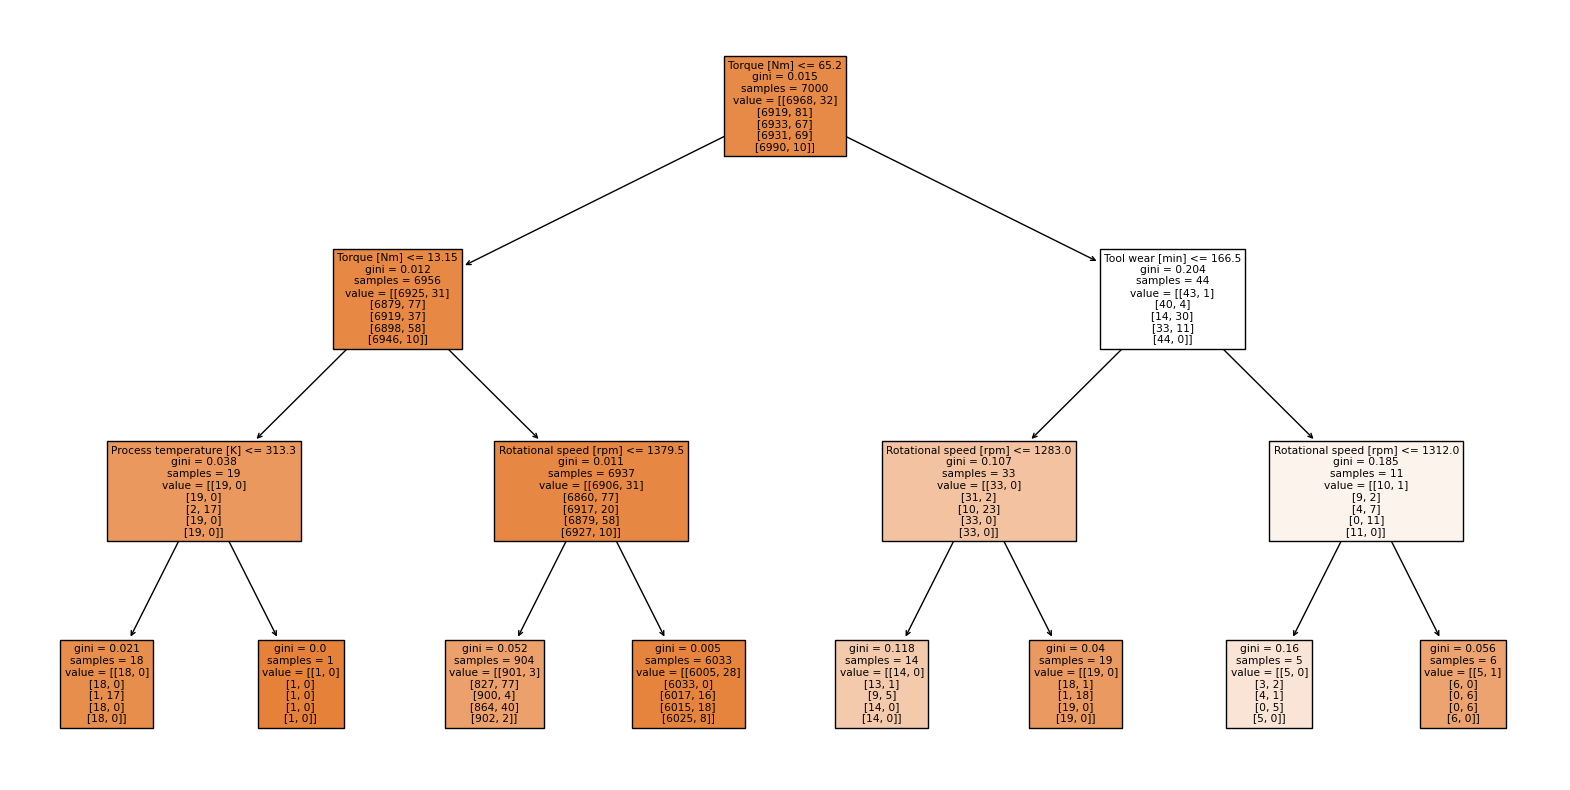

In [ ]:
# Display our tree
plt.figure( figsize=(20,10))

_ = tree.plot_tree( est,
                    feature_names= eegCols,
                    class_names = T,
                    filled = True )

# Things to note

Each individual failure mode tree predicted really well.

Combined tree still predicted really well

Torque is a major predictor for all of these modes, makes sense as very high or low torque could indicate or cause issues within machinery.



---



# Reults

I'm confident trying a random forest classifier after the results below.

In [ ]:
!pip install lazypredict

In [ ]:
# Lazy predict will do what you expect
# Predict for me on a ton of models
import lazypredict
from lazypredict.Supervised import LazyClassifier

# Create and run LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:20<00:00,  1.40it/s]

[LightGBM] [Info] Number of positive: 16, number of negative: 6984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002286 -> initscore=-6.078788
[LightGBM] [Info] Start training from score -6.078788
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best



---

